# Introduction to Machine Learning (ML)

by [@barbara_plank](https://twitter.com/barbara_plank)

[with parts inspired by many, amongst which: Anders Johannsen, Malvina, sklearn tutorial.. thanks!]

## Machine learning = learning from data

learning what? 

to make **predictions**

* is today a good day to get an ice cream?
* what is the sentiment of this tweet?
* how is the weather in 24h from now?

## What do you do in front of a zebra crossing?

<img src="pics/zebracrossing.jpg">
[Example inspired by traffic light by M.Nissim]

## Zebra crossing

**STOP** or **GO**

How can we teach someone this behavior?

* create ad hoc **rules** (as exhaustive as possible)
* collect a set of real **examples** of what people do at a zebra crossing

### Examples

collect **examples** (cases) of zebra crossings and people's behavior (stop or go)

* zebra crossing $\rightarrow$ **features** (characteristics)
* result $\rightarrow$ **label** (category: stop, go)

with these examples we can use machine learning to **induce** a classifier (= **build a predictor**) that **generalizes** from the observed exampels

## Why can't we just build a predictor by coding it up?

* can't be exhaustive enough
* often we don't know how
* trade-off between cost of obtaining **data** versus **knowledge**

### Machine Learning versus traditional programming

<img src="pics/prog-vs-ml.png" width=600>

## How do we know that our model generalized?

We want to build a classifier that generalizes, i.e., that works *beyond* the training data.

It generalizes reasonably well if it can predict well on new **unseen** test cases.

## Machine Learning is ubiquitous

* recommended books in online book stores
* your spam classifier
* automatic machine translation
* NetFlix movie recommendation


## ML is the future, and you know it
*Name one thing that computers cannot do today but might be able to accomplish in five years.*



- "Make interesting conversational partners"
- "Flawless object recognition (when objects are shown from an unfamiliar angle)"
- "Cook food via robots?"
- "Having AI similar to humans ... Strong AI."
- "Summarize the plot of a movie by visual analysis."

[examples from AJ]

## Classification

In classification we assign a *discrete* label to an object.

<img src="pics/running.jpg">


For instance, **what kind of food is passing on the running belt**?

In programming terms, a classifier is an algorithm for deciding which category the object belongs to.
In math terms, a classifier is a function that maps the object to a set of discrete categories.

### Function notation

$$f: \mathbb{R} \mapsto \mathbb{R}$$

In [6]:
def triple(a_number):
    return 3 * a_number

$$f: \mathbb{R} \mapsto \{-1, 1\}$$

In [59]:
def is_expensive_house(house_price):
    if house_price > 1000000:
        return 1
    else: 
        return -1

### Classifier as a function

Formally, we can think of a classifier as a mathmatical function $h$, mapping from the input to one of $k$ output categories. Often the input is a vector of real numbers.

$$h: \mathbb{R}^d \mapsto \{1, 2, \ldots, k\} $$

In some cases our instances can be represented by a binary vector

$$h: \mathbf{2}^d \mapsto \{1, 2, \ldots, k\}$$

In [8]:
# `instance` is a set of properties
def classify_animal(instance):
    if 'extinct' in instance and 'feathered' in instance:
        return 'dinosaur'
    elif 'feathered' in instance:
        return 'bird'
    else:
        return 'mammal'

## Machine learning algorithms

Machine learning algorithms are a special kind of algorithms that take data as input and return a new algorithm as output. E.g. 

$$f: \mathcal{D} \mapsto \left(\mathbb{R}^d \mapsto \{1, 2, \ldots, k\}\right)$$


Machine learning classification algorithms differ with respect to 

- What kind of input they can learn from (labeled, partly labeled, unlabeled).
- How the hypothesis function $h$ is represented.
- How well the hypothesis $h$ generalizes to new data.

## What we need

1. Data
  * what your data looks, the input $X$ and output (labels) $Y$ 
2. Features
  * how to represent your data (the actual features): how to decompose $X$ into its parts by $\phi$
3. Model/Algorithm
  * the machine learning algorithm used 
4. Evaluation
  * how to measure how good your model is 

To visualize the whole:

<img src="pics/learning.png" width=800>

## Classification vs Regression


The goal of machine learning is to find a function $f$ that, given some input $x$, produces predictions for that input, $y$.

In **supervised machine learning** the y’s are given, and are called the labels. They can be categorial, like ”sports”, ”news”, etc. or numerical, e.g. 7, 8,10. If the labels are categorical we speak of classification, in case of numerical labels the task is regression.

## Training a classifier on the IRIS dataset

In this section, we will train a classifier on the [IRIS data set](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html). 

<img src="pics/iris.png" width=300>
This data set about plants is included in sklearn and already ready to use, meaning that features are already extracted for the data instances x, and each training instance has an associated class label y. In the next section we will see how to extract features and use them in sklearn.
The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Technically, it is stored as a python dict, thus we can see dict.keys() to inspect what it contains:

In [13]:
from sklearn import datasets
iris = datasets.load_iris()


The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Tech- nically, it is stored as a python dict, thus we can see dict.keys() to inspect what it contains:

In [18]:
iris.keys()

dict_keys(['data', 'DESCR', 'target', 'feature_names', 'target_names'])

In [60]:
# the possible Y's (labels/categories)
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Looking at the labels of the IRIS dataset:

In [61]:
import numpy as np
iris_X = iris.data
iris_y = iris.target
## in sklearn labels/categories are actually encoded as numbers!
print(np.unique(iris_y))

[0 1 2]


### How do the examples/data instances/cases look like?

Each training instance consists of 4 attributes (thus is 4-dimensional, or a vector with 4 dimensions), in this case numerical measurements. We can get a description using feature_names. For instance, lets look at the first data instance $x_0$:

In [21]:
iris['data'][0]

array([ 5.1,  3.5,  1.4,  0.2])

In [22]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<img src="http://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" width=400>

The class labels y for the instances are actually stored in iris[’target’] as integers (indices corresponding to the respective target_names entry). Thus, the first instances is of type setosa:

In [24]:
iris['target'][0]

0

## Training 


Now we are ready to train a classifier on 80% of the data, and evaluate on the remaining 20%. We will train both a k-nearest neighbor classifier as well as logistic regression model, and evaluate both

In [49]:
#!/usr/bin/python
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# 3 classes, 150 instances: X=iris[’data’]  y=iris[’target’]
iris = datasets.load_iris()
# create random permutation with seed (uncomment to get fixed set)
#np.random.seed(1253)
indices = np.random.permutation(len(iris['data']))
# split in 80% train, 20% test
len_test = int(len(iris['data'])*0.2)
# train part (all except test part)
X_train = iris['data'][indices[:-len_test]]
y_train = iris['target'][indices[:-len_test]]
# test part
X_test = iris['data'][indices[-len_test:]]
y_test = iris['target'][indices[-len_test:]]
# output statistics
print("#inst train: %s" % (len(X_train)))
print("#inst test: %s" % (len(X_test)))
# learn knn classifier
knn = LogisticRegression()
knn.fit(X_train, y_train)
print(knn)
y_pred= knn.predict(X_test)
print("Pred:", y_pred)
print("Gold:", y_test)
# get accuracies
print(classification_report(y_test, y_pred, target_names=iris['target_names']))
print(confusion_matrix(y_test, y_pred))

#inst train: 120
#inst test: 30
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Pred: [1 1 2 0 0 1 1 2 2 2 1 1 0 1 2 1 2 1 2 2 2 2 0 2 1 2 0 0 0 2]
Gold: [1 2 2 0 0 1 1 2 2 2 1 1 0 1 2 1 2 1 2 2 2 2 0 2 1 2 0 0 0 1]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.90      0.90      0.90        10
  virginica       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        30

[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]


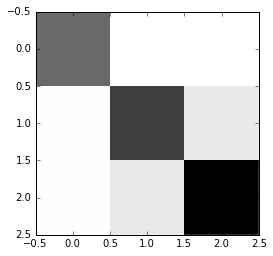

In [50]:
% matplotlib inline
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [54]:
## an alternative
import pandas as pd
def crosstab(pred, gold):
    y_true = pd.Series(gold)
    y_pred = pd.Series(pred)
    print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
crosstab(y_test, y_pred)

Predicted  0   1   2  All
True                     
0          7   0   0    7
1          0   9   1   10
2          0   1  12   13
All        7  10  13   30


## Exercise:

* Use the K-nearest neighbor classifier for the Iris dataset. Compare its performance to logistic regression.

* features, feature templates
* sentiment example

## Recap: Machine Learning

### Input and output
 
The goal of supervised machine learning is to find a function $h$ that maps from some percept or input $x$ to a label $y$. What $x$ and $y$ are depends on the task. Many banks, for instance, use a learned function to decide whether to give credit to a customer or not. Here, $x$ is the credit application and $y$ is the outcome: approved or declined. In NLP, $x$ could be a tweet and $y$ could be its sentiment, or $x$ could be a sentence and $y$ is syntactic parse tree; and so forth. Let $x \in \mathcal{X}$ (input space) and $y \in \mathcal{Y}$ (label space).

NLP applications almost always have **discrete** output spaces. In these lectures $y$ will either be an integer (for classification) or a vector of integers (for structured prediction). 

### Target and hypothesis function

We’ll make the assumption that there exists an **unknown target function** which is solving the problem we’re interested in:

$$f: \mathcal{X} \mapsto \mathcal{Y}$$

This, of course, is a bit of a fiction. It doesn’t really exist anywhere, but it’s a useful fiction because it allows us to describe the goal, which is to learn a **hypothesis function** $h$ that is as close as possible to the target function. Naturally, the hypothesis function performs the same mapping as the unknown target function:

$$h: \mathcal{X} \mapsto \mathcal{Y}$$

### Dataset 

It gets worse before it gets better. Not only is our target function unknown, we also don’t know the true distribution of our inputs $P(x)$. We don’t know which tweets will be written or the kinds of backgrounds people who apply for credit will have.   

Supervised learning rests on the idea that we can get a limited number of examples (i.e. **a sample**) 

$$x_1, \ldots, x_n \sim P(x)$$

from the unknown input distribution $P(x)$, and that we (somehow) can evaluate on the unknown target function $f$ on these examples. 

Putting this together yields the concept of a **training set**:

$$\mathcal{D}_t = \{(x_1, f(x_1) ), \ldots (x_n, f(x_n)) \}$$

How do we gain access to the unknown target function? The bank might look at past credit applications together with the decisions. In NLP we often ask *people* to annotate.

#### Unsupervised and semi-supervised learning

It’s easy to imagine a situation where we could arrange to get a large sample of data from $P(x)$ without labels being included in the deal. The setting in which there are no labels at all is called **unsupervised learning**. When unlabeled data is available in addition to a labeled dataset this is **semi-supervised learning**. 

### Feature representation

We’ll never have to read the same Twitter message twice, hopefully. By the time a failed credit application is resubmitted, the customer’s circumstances are likely different, and so the  application isn’t the same anymore. “You cannot submit a credit application twice,” as Heraclitus might have said. 

This poses a problem in that we wish to learn from the past, but whatever happened in the past it will not happen *exactly* like that again. Instead something *similar* might happen. So we need a way to break up our observations (the $x$es) to make them comparable even if the don’t match exactly. 

Luckily, our observations are typically not unique snowflakes, but can decomposed into **features** in some **feature space** $\mathcal{F}$. Even though the learner might not have seen the new example exactly, it might have seen similar examples (or parts of the current example), and thus still be able to make a prediction.

Specifically, each input example is transformed into a suitable **input representation** for the learning algorithm by a **feature function** $\phi(x)$. The feature function $\phi(\cdot)$ maps examples from the input space to the feature space:

$$\phi: \mathcal{X} \rightarrow \mathcal{F}$$

Typically, the $\phi(x)$ is a real-valued vector of some fixed dimension $d$, i.e. 

$$\mathcal{F} = \mathbb{R}^d$$

Note that the $\phi$ feature function is deterministic and not a part of the learner. Traditionally, a large body of work in NLP focused on finding better ways to map from input to feature representations for specific tasks by hand. 


# References

* [sklearn: Working with text data](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
* Malvina Nissim and Johannes Bjerva. Learning from data, [ESSLLI 2016 lecture 1](http://esslli2016.unibz.it/wp-content/uploads/2015/10/lecture1.pdf)